In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("HomeC.csv", low_memory=False)
df.head()


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [3]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df.head()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
df.isnull().sum()


use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [5]:
df.ffill(inplace=True)


In [6]:
df.isnull().sum()


use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [7]:
energy_cols = [col for col in df.columns if '[kW]' in col]
energy_cols


['use [kW]',
 'gen [kW]',
 'House overall [kW]',
 'Dishwasher [kW]',
 'Furnace 1 [kW]',
 'Furnace 2 [kW]',
 'Home office [kW]',
 'Fridge [kW]',
 'Wine cellar [kW]',
 'Garage door [kW]',
 'Kitchen 12 [kW]',
 'Kitchen 14 [kW]',
 'Kitchen 38 [kW]',
 'Barn [kW]',
 'Well [kW]',
 'Microwave [kW]',
 'Living room [kW]',
 'Solar [kW]']

In [8]:
mean_vals = df[energy_cols].mean()
std_vals = df[energy_cols].std()

mean_vals


use [kW]              0.956471
gen [kW]              0.066935
House overall [kW]    0.956471
Dishwasher [kW]       0.033798
Furnace 1 [kW]        0.192918
Furnace 2 [kW]        0.221994
Home office [kW]      0.078773
Fridge [kW]           0.053771
Wine cellar [kW]      0.020883
Garage door [kW]      0.013710
Kitchen 12 [kW]       0.002332
Kitchen 14 [kW]       0.007424
Kitchen 38 [kW]       0.000010
Barn [kW]             0.063928
Well [kW]             0.017044
Microwave [kW]        0.009625
Living room [kW]      0.039231
Solar [kW]            0.066935
dtype: float64

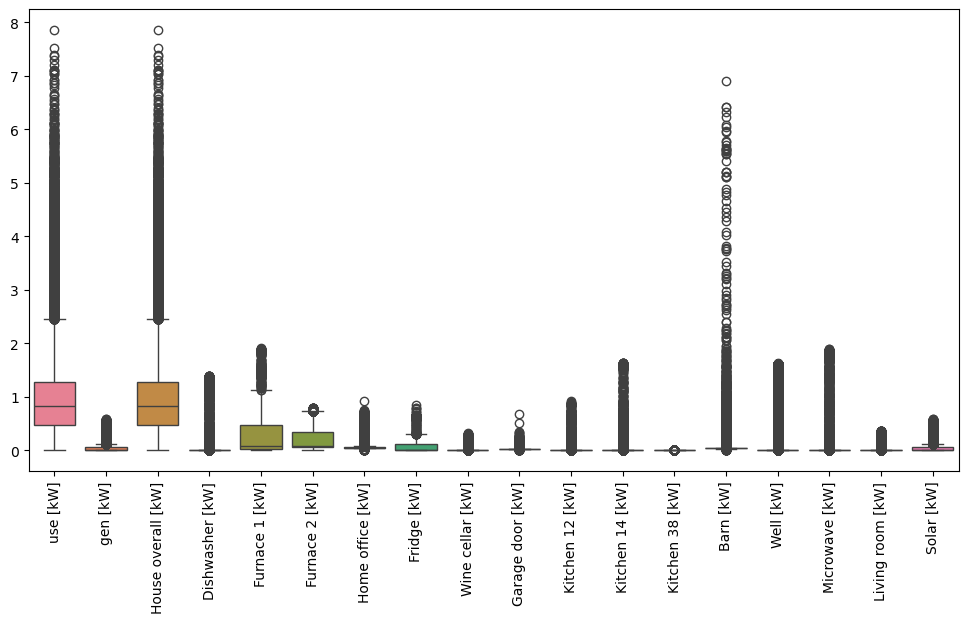

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[energy_cols])
plt.xticks(rotation=90)
plt.show()


In [10]:
threshold = mean_vals + (2 * std_vals)

for col in energy_cols:
    df = df[df[col] <= threshold[col]]

df.shape


(60477, 31)

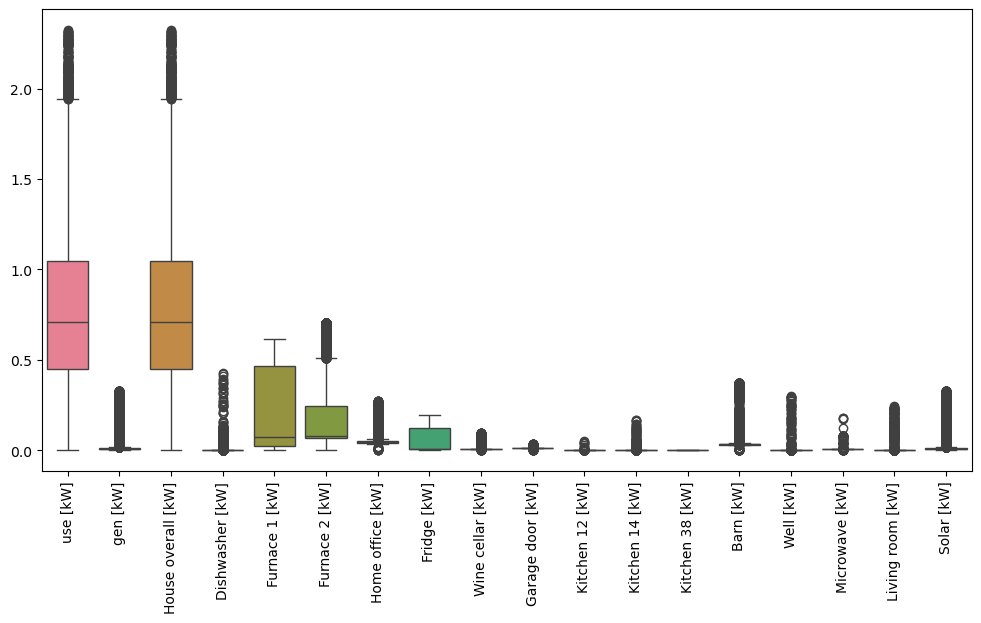

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[energy_cols])
plt.xticks(rotation=90)
plt.show()


In [12]:
original_rows = pd.read_csv("HomeC.csv", low_memory=False).shape[0]
cleaned_rows = df.shape[0]

print("Rows Before Cleaning:", original_rows)
print("Rows After Cleaning:", cleaned_rows)


Rows Before Cleaning: 108793
Rows After Cleaning: 60477


In [13]:
scaler = MinMaxScaler()
df[energy_cols] = scaler.fit_transform(df[energy_cols])
df.head()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:16,0.208941,0.010615,0.208941,0.000039,0.033417,0.089622,0.805613,0.024959,0.073680,0.391789,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:17,0.225051,0.010564,0.225051,0.000000,0.033444,0.087750,0.950580,0.024788,0.073326,0.390775,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:18,0.230659,0.010615,0.230659,0.000000,0.033525,0.088887,0.994570,0.024788,0.073680,0.392803,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:19,0.229777,0.010615,0.229777,0.000039,0.033498,0.088508,0.987248,0.024788,0.074389,0.392803,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:00:20,0.229634,0.010615,0.229634,0.000000,0.033444,0.088958,0.987126,0.024788,0.073680,0.391789,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [14]:
df[energy_cols].describe().loc[['min','max']]


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW]
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
